#### Tycho Koster 10667687
#### David Stap 10608516

## 1: reading in data

In [1]:
import csv
import string
import numpy as np

def get_training_data(feature):
    check = ['MLS','Bedrooms','Bathrooms','Size','Price']
    index = check.index(feature)
    training_list = list()
    
    
    with open('housesRegr.csv', 'rU') as csvfile:
        csvreader = csv.reader(csvfile)
        for row in csvreader:
            training_data = row[0].split(';')
            training_list.append(training_data[index])

    return training_list[1:];


prices = np.array(get_training_data('Price')).astype(np.float)
bedrooms = np.array(get_training_data('Bedrooms')).astype(np.float)
bathrooms = np.array(get_training_data('Bathrooms')).astype(np.float)
size = np.array(get_training_data('Size')).astype(np.float)

# normalize size, for better results
size = np.array(get_training_data('Size')).astype(np.float)/100

## 2: cost function

In [3]:
# return  y of function
def fx(x, theta_0, theta_1):
    return theta_0 + theta_1 * int(x)

In [4]:
'''
Calculates cost function J
Input: theta_0, theta_1, x, y
Output: cost
'''
def J(theta_0, theta_1, x, y):
    m = len(x)
    
    sum_error = 0
    for i in range(m):
        sum_error += (fx(int(x[i]), theta_0, theta_1) - int(y[i]))**2
    
    return (1.0/(2*m)) * sum_error
    
# test badrooms no iterations
print J(0, 1, bathrooms, prices)
# test badrooms 50 iterations
print J(31189.03, 155656.13, bathrooms, prices)
# test badrooms 50 iterations
print J(-121865.62, 214433.20, bathrooms, prices)

1.34305350116e+11
45721571292.5
44378838840.7


In [5]:
'''
Caclculates fx(x^(i)) values for array x
Input: x (numpy array), theta_0, theta_1, m)
Output: fx(x^(i)) array
'''
def make_fx_x(x, theta_0, theta_1, m):
    fx_x = np.zeros(m)
    for i in range(m):
        fx_x[i] = fx(int(x[i]), theta_0, theta_1)
    
    return fx_x

## 3: parameter updating (iterative)

In [13]:
'''
Calculates theta_0 using an iterative process
Input: theta_0, theta_1, x (list with values), y (list with values), learning rate alpha
Output: gradient for theta_0
'''
def gradientTheta_0_iter(theta_0, theta_1, x, y, alpha):
    m = len(x)

    sum_training = 0
    for i in range(m):
        sum_training += fx(int(x[i]), theta_0, theta_1)- int(y[i])
    
    return theta_0 - (alpha * ((1.0/m) * sum_training))

'''
Calculates theta_1 using an iterative process
Input: theta_0, theta_1, x (list with values), y (list with values), learning rate alpha
Output: gradient for theta_1
'''
def gradientTheta_1_iter(theta_0, theta_1, x, y, alpha):
    m = len(x)
    sum_training = 0
    for i in range(m):
        sum_training += (fx(int(x[i]), theta_0, theta_1)- int(y[i])) * int(x[i])
    
    return theta_1 - (alpha * ((1.0/m) * sum_training))


print 'test run (paper homework, theta_0)'
print gradientTheta_0_iter(0, 1, [6,5,3], [5,6,10], 0.01)
print '\ntest run (paper homework, theta_1)'
print gradientTheta_1_iter(0, 1, [6,5,3], [5,6,10], 0.01)

test run (paper homework, theta_0)
0.0233333333333

test run (paper homework, theta_1)
1.06666666667


## 3: parameter updating (vector)

In [14]:
import numpy.linalg as linalg

'''
Calculates theta_0 and theta_1 with normal equation (vectors)
Input: x (numpy array), y (numpy array)
Output: gradient for theta_0
'''
def normal_equation(temp_x, temp_y):
    x = np.array([np.ones(len(temp_x)), temp_x]).transpose()
    y = temp_y[:, np.newaxis]
    # calculate (X^T*X)^-1 * X^T * y
    normal_equation = np.dot(np.dot(linalg.inv(np.dot(x.transpose(), x)), x.transpose()), y)
    
    # return theta_0, theta_1
    return normal_equation[0][0], normal_equation[1][0]

print 'test run (paper homework)'
theta_0, theta_1 = normal_equation(np.array([6,5,3]),  np.array([5,6,10]))
print 'theta_0: ' + str(theta_0)
print 'theta_1: ' + str(theta_1)

print '\ntest run (bathrooms, prices)'
theta_0, theta_1 = normal_equation(bathrooms, prices)
print 'theta_0: ' + str(theta_0)
print 'theta_1: ' + str(theta_1)

test run (paper homework)
theta_0: 15.0
theta_1: -1.71428571429

test run (bathrooms, prices)
theta_0: -121865.675013
theta_1: 214433.221296


## 4: plotting data (csv file scatter)

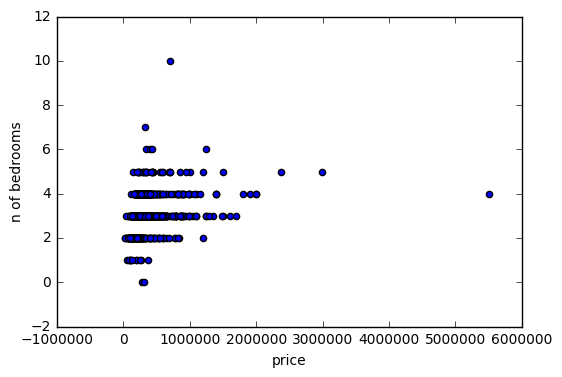

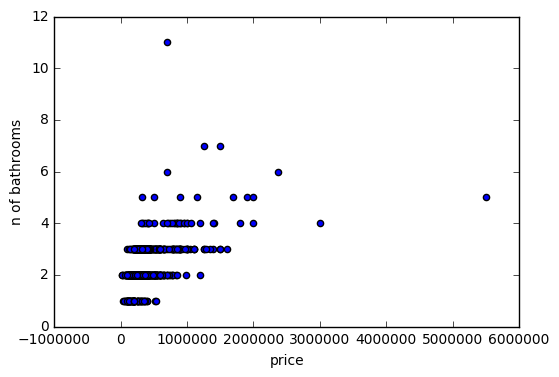

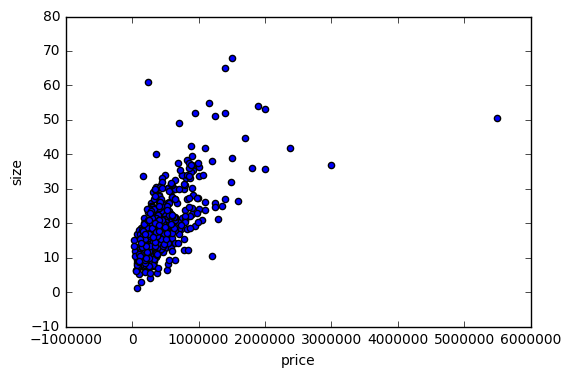

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

'''
Plot_data
Input: x (list with values), y (list with values), name for x-axis, name for y-axis
Output: plots with names for x- and y-axis
'''
def plot_data(x, y, x_name, y_name):
    plt.scatter(x, y)
    plt.xlabel(x_name, fontsize = 10)
    plt.ylabel(y_name, fontsize = 10)
    
    plt.show()

    
#print(prices[:1000])    
    
plot_data(prices, bedrooms, 'price', 'n of bedrooms')
plot_data(prices, bathrooms, 'price', 'n of bathrooms')
plot_data(prices, size, 'price', 'size')

## 4: regression function + plot line function

In [18]:
'''
Regression function (iterative)
Input: theta_0, theta_1, x (numpy array), y(numpy array), alpha, n of iterations
Output: results for theta_0 and theta_0 after n iterations
'''
def regression_iter(theta_0, theta_1, x, y, alpha, iterations):
    for i in range(iterations):
        temp_theta_0 = gradientTheta_0_iter(theta_0, theta_1, x, y, alpha)
        temp_theta_1 = gradientTheta_1_iter(theta_0, theta_1, x, y, alpha)
        theta_0 = temp_theta_0
        theta_1 = temp_theta_1
    return theta_0, theta_1

'''
Plots hypothesis + scattered data points
Input: x (numpy array), y (numpy array), theta_0, theta_1, name for x axis, name for y axis
Output: results for theta_0 and theta_0 after n iterations
'''
def plot_line(x, y, theta_0, theta_1, x_name, y_name):
    h_x = make_fx_x(x, theta_0, theta_1, len(x))
    plt.scatter(x, y)
    plt.plot(x, h_x)
    plt.xlabel(x_name, fontsize = 10)
    plt.ylabel(y_name, fontsize = 10)
    plt.show()

## 5: regression function (bathrooms, prices)
### resulting theta_0, resulting theta_1, resulting cost, resulting plot

###### First 3 plots: iterative (n = 50, n = 500, n = 5000)
###### Final plot: normal equation

#### iterations = 50

bathrooms, prices, 50 iterations
theta 0: 31189.034912
theta 1: 155956.133376
cost: 45719535370.6


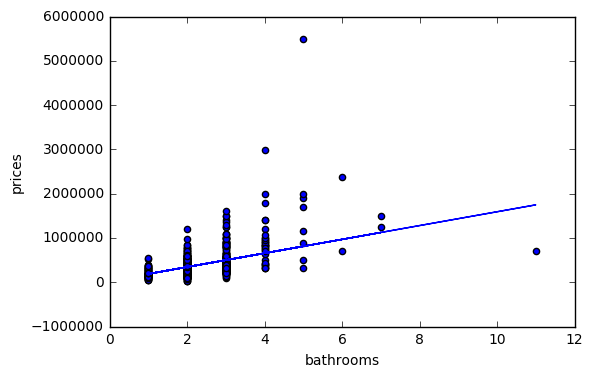

In [20]:
print 'bathrooms, prices, 50 iterations'
t0, t1 = regression_iter(0, 1, bathrooms, prices, 0.03, 50)
print 'theta 0: '+str(t0)
print 'theta 1: '+str(t1)
cost = J(t0, t1, bathrooms, prices)
print 'cost: '+str(cost)

plot_line(bathrooms, prices, t0, t1, 'bathrooms', 'prices')    

#### iterations = 500

bathrooms, prices, 500 iterations
theta 0: -82205.3479819
theta 1: 199280.577292
cost: 44468860685.6


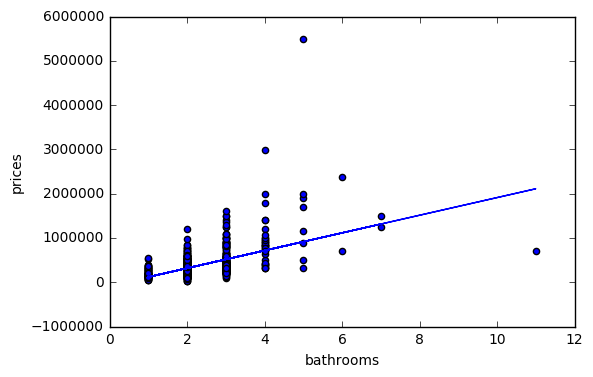

In [21]:
print 'bathrooms, prices, 500 iterations'
t0, t1 = regression_iter(0, 1, bathrooms, prices, 0.03, 500)
print 'theta 0: '+str(t0)
print 'theta 1: '+str(t1)
cost = J(t0, t1, bathrooms, prices)
print 'cost: '+str(cost)

plot_line(bathrooms, prices, t0, t1, 'bathrooms', 'prices')    

#### iterations = 5000

bathrooms, prices, 5000 iterations
theta 0: -121865.620882
theta 1: 214433.200615
cost: 44378838840.7


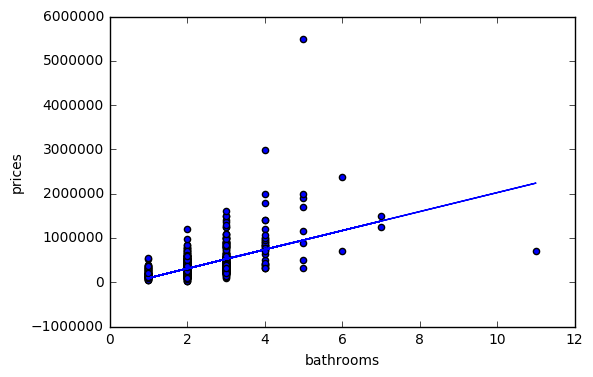

In [23]:
print 'bathrooms, prices, 5000 iterations'
t0, t1 = regression_iter(0, 1, bathrooms, prices, 0.03, 5000)
print 'theta 0: '+str(t0)
print 'theta 1: '+str(t1)
cost = J(t0, t1, bathrooms, prices)
print 'cost: '+str(cost)

plot_line(bathrooms, prices, t0, t1, 'bathrooms', 'prices')    

#### Normal equation

bathrooms, prices, normal equation
theta 0: -121865.675013
theta 1: 214433.221296
cost: 44378838840.7


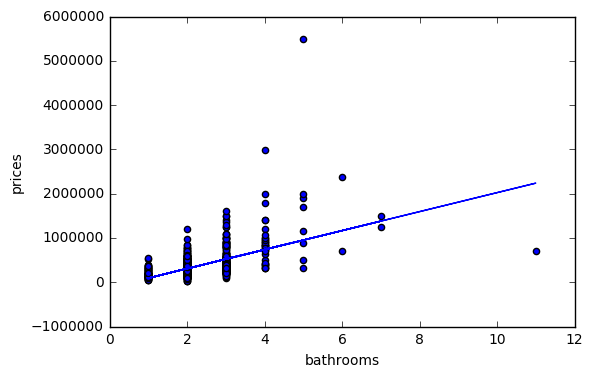

In [30]:
print 'bathrooms, prices, normal equation'
t0, t1 = normal_equation(bathrooms, prices)
print 'theta 0: '+str(t0)
print 'theta 1: '+str(t1)
cost = J(t0, t1, bathrooms, prices)
print 'cost: '+str(cost)

plot_line(bathrooms, prices, t0, t1, 'bathrooms', 'prices')    

## 5: regression function (bedrooms, prices)
### resulting theta_0, resulting theta_1, resulting cost, resulting plot
###### First 3 plots: iterative (n = 50, n = 500, n = 5000)
###### Final plot: normal equation

#### iterations = 50

bedrooms, prices, 50 iterations
theta 0: 35415.4773091
theta 1: 110252.203391
cost: 52149898979.5


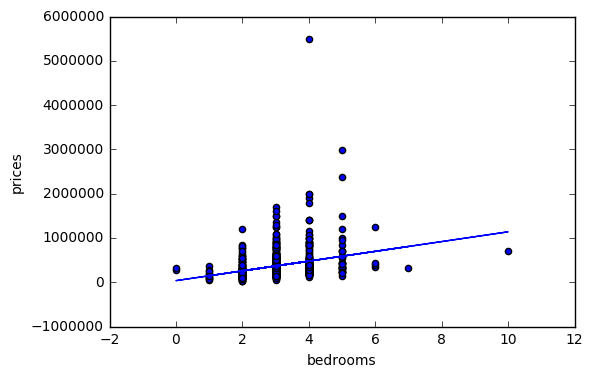

In [24]:
print 'bedrooms, prices, 50 iterations'
t0, t1 = regression_iter(0, 1, bedrooms, prices, 0.03, 50)
print 'theta 0: '+str(t0)
print 'theta 1: '+str(t1)
cost = J(t0, t1, bathrooms, prices)
print 'cost: '+str(cost)

plot_line(bedrooms, prices, t0, t1, 'bedrooms', 'prices')    

#### iterations = 500

bedrooms, prices, 500 iterations
theta 0: 48917.544718
theta 1: 106227.417012
cost: 52109509704.3


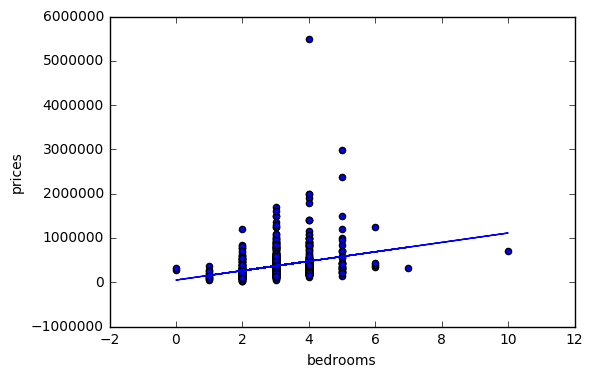

In [25]:
print 'bedrooms, prices, 500 iterations'
t0, t1 = regression_iter(0, 1, bedrooms, prices, 0.03, 500)
print 'theta 0: '+str(t0)
print 'theta 1: '+str(t1)
cost = J(t0, t1, bathrooms, prices)
print 'cost: '+str(cost)

plot_line(bedrooms, prices, t0, t1, 'bedrooms', 'prices')    

#### iterations = 5000

bedrooms, prices, 5000 iterations
theta 0: 58883.2822956
theta 1: 103256.763381
cost: 52097501479.7


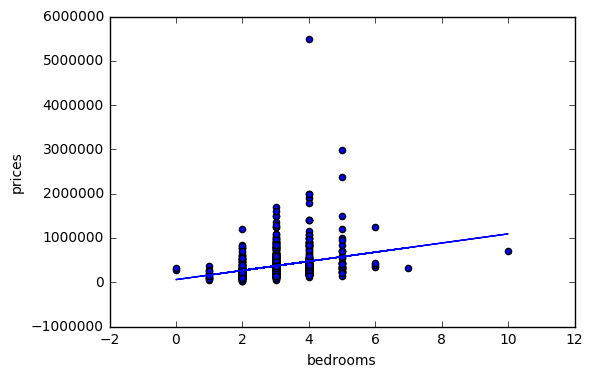

In [26]:
print 'bedrooms, prices, 5000 iterations'
t0, t1 = regression_iter(0, 1, bedrooms, prices, 0.03, 5000)
print 'theta 0: '+str(t0)
print 'theta 1: '+str(t1)
cost = J(t0, t1, bathrooms, prices)
print 'cost: '+str(cost)

plot_line(bedrooms, prices, t0, t1, 'bedrooms', 'prices')    

#### Normal equation

bedrooms, prices, normal equation
theta 0: 58885.1852974
theta 1: 103256.196122
cost: 52097500630.6


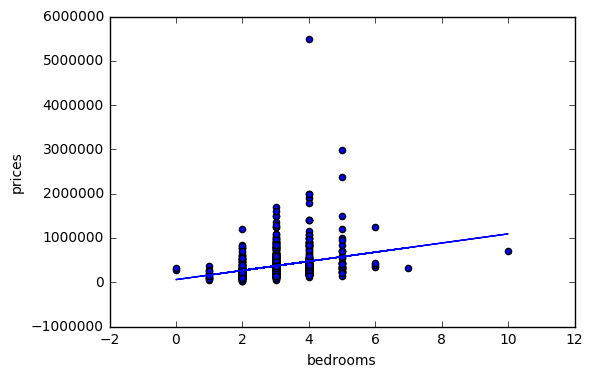

In [31]:
print 'bedrooms, prices, normal equation'
t0, t1 = normal_equation(bedrooms, prices)
print 'theta 0: '+str(t0)
print 'theta 1: '+str(t1)
cost = J(t0, t1, bathrooms, prices)
print 'cost: '+str(cost)

plot_line(bedrooms, prices, t0, t1, 'bedrooms', 'prices')    

## 5: regression function (size, prices)
### resulting theta_0, resulting theta_1, resulting cost, resulting plot
###### First 3 plots: iterative (n = 50, n = 500, n = 5000)
###### Final plot: normal equation

#### iterations = 50

size, prices, 50 iterations
theta 0: -1622.88373122
theta 1: 23496.6358077
cost: 35082973877.6


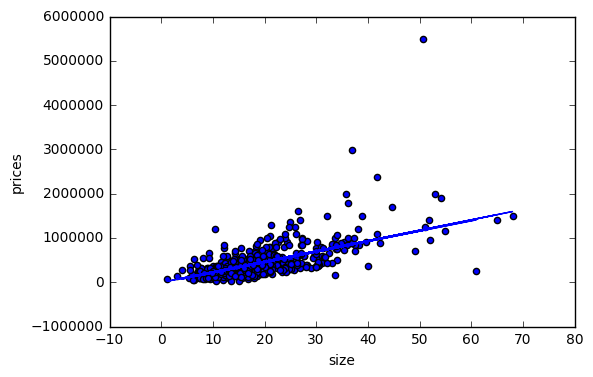

In [27]:
print 'size, prices, 50 iterations'
t0, t1 = regression_iter(0, 1, size, prices, 0.003, 50)
print 'theta 0: '+str(t0)
print 'theta 1: '+str(t1)
cost = J(t0, t1, size, prices)
print 'cost: '+str(cost)

plot_line(size, prices, t0, t1, 'size', 'prices')

#### iterations = 500

size, prices, 500 iterations
theta 0: -23051.2424128
theta 1: 24513.2154926
cost: 34740374672.7


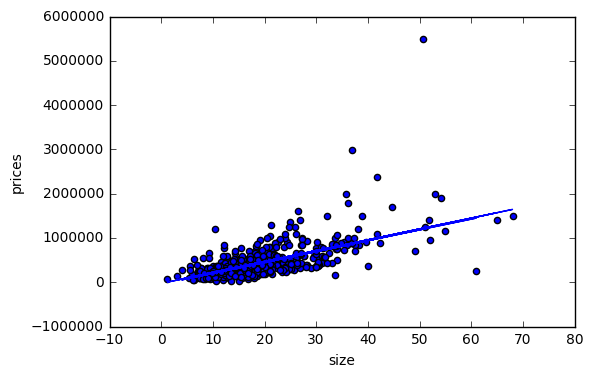

In [28]:
print 'size, prices, 500 iterations'
t0, t1 = regression_iter(0, 1, size, prices, 0.003, 500)
print 'theta 0: '+str(t0)
print 'theta 1: '+str(t1)
cost = J(t0, t1, size, prices)
print 'cost: '+str(cost)

plot_line(size, prices, t0, t1, 'size', 'prices')

#### iterations = 5000

size, prices, 5000 iterations
theta 0: -91835.6356264
theta 1: 27776.4060064
cost: 34220643294.4


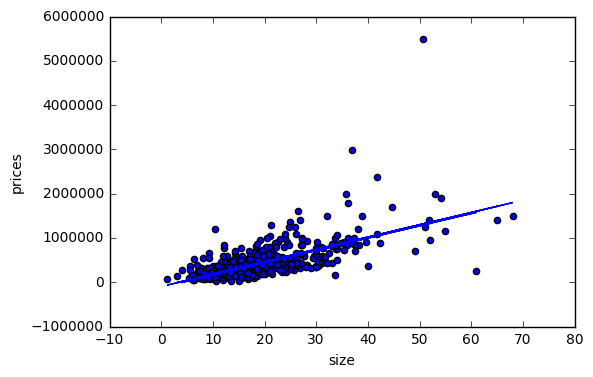

In [29]:
print 'size, prices, 5000 iterations'
t0, t1 = regression_iter(0, 1, size, prices, 0.003, 5000)
print 'theta 0: '+str(t0)
print 'theta 1: '+str(t1)
cost = J(t0, t1, size, prices)
print 'cost: '+str(cost)

plot_line(size, prices, t0, t1, 'size', 'prices')

#### Normal equation

size, prices, normal equation
theta 0: -113509.751657
theta 1: 28308.9565882
cost: 34284491500.7


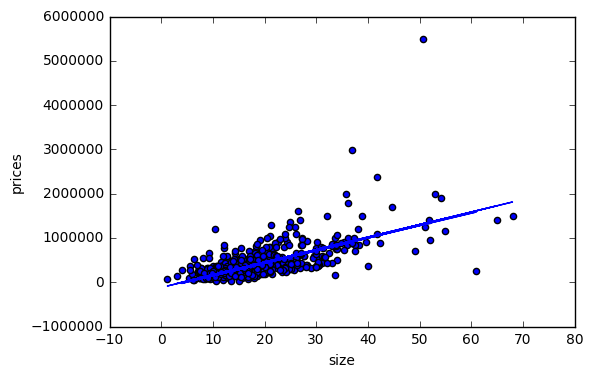

In [32]:
print 'size, prices, normal equation'
t0, t1 = normal_equation(size, prices)
print 'theta 0: '+str(t0)
print 'theta 1: '+str(t1)
cost = J(t0, t1, size, prices)
print 'cost: '+str(cost)

plot_line(size, prices, t0, t1, 'size', 'prices')